# (Ford GoBike System Dataset)
## by (Mahmoud Shabban)

## Preliminary Wrangling

> This data set includes information about individual rides made
in a bike-sharing system covering the greater San Francisco
Bay are.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
bikes = pd.read_csv('201902-fordgobike-tripdata.csv')
print(bikes.shape)
print(bikes.dtypes)
print(bikes.head(8))

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:2

In [3]:
bikes.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [4]:
print(bikes.describe())

        duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.00000

### What is the structure of your dataset?

> this dataset contains 183412 enteries structured in 16 columns 
7 columns cnotain data with type string object, 2 columns with data types of intger and 7 columns 
are float datatype.
there are 8265 null data in this dataset.

### What is/are the main feature(s) of interest in your dataset?

> I am most intersted in the relationship between the user age and trip duration, the most common interval of the day
that has more customers. the distribution of the customers genders common trip duration. 
the most common trip (start point --to---> end point)
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>  start time, start and end staition id and birth year , cutomer type and cutomer gender.

### Data wrangling step.
removing null data points

In [5]:
bikes.dropna(axis=0, inplace=True)

removing unnecessarty data

In [6]:
bikes.drop(columns=["start_station_longitude","start_station_latitude","end_station_longitude","end_station_latitude",'bike_share_for_all_trip','bike_id'], inplace=True)

converting time and date to time stamp with pandas to extract the trip month

In [7]:
bikes['start_time'] = pd.to_datetime(bikes['start_time'])
bikes['end_time'] = pd.to_datetime(bikes['end_time'])

extracting trip month

In [8]:
bikes['day_time'] = bikes['start_time'].apply(lambda x: x.month_name())

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [9]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   duration_sec        174952 non-null  int64         
 1   start_time          174952 non-null  datetime64[ns]
 2   end_time            174952 non-null  datetime64[ns]
 3   start_station_id    174952 non-null  float64       
 4   start_station_name  174952 non-null  object        
 5   end_station_id      174952 non-null  float64       
 6   end_station_name    174952 non-null  object        
 7   user_type           174952 non-null  object        
 8   member_birth_year   174952 non-null  float64       
 9   member_gender       174952 non-null  object        
 10  day_time            174952 non-null  object        
dtypes: datetime64[ns](2), float64(3), int64(1), object(5)
memory usage: 16.0+ MB


In [10]:
bikes['customer_age'] = 2019 - bikes['member_birth_year']

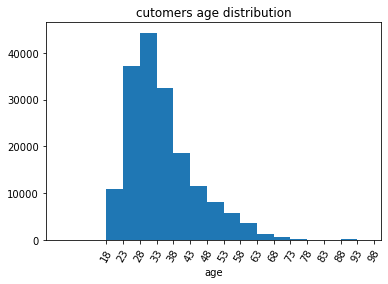

In [11]:
bins = np.arange(bikes['customer_age'].min(),bikes['customer_age'].max()+5,5)
plt.hist(data= bikes, x= 'customer_age',bins= bins);
plt.xticks(bins, rotation= 60);
plt.xlim((0,100));
plt.title('cutomers age distribution');
plt.xlabel('age');

this histogram shows that the majority of members between 28 and 33 yeaers old
followed by yonger members between 23 to 28

In [12]:
order = bikes['member_gender'].value_counts().index

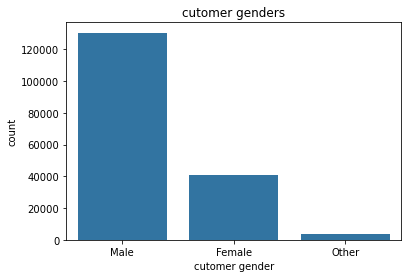

In [13]:
base_color = sb.color_palette()[0]
sb.countplot(data= bikes, x= 'member_gender', color=base_color, order = order);
plt.title('cutomer genders');
plt.xlabel('cutomer gender');

this plot shows that the common members are men

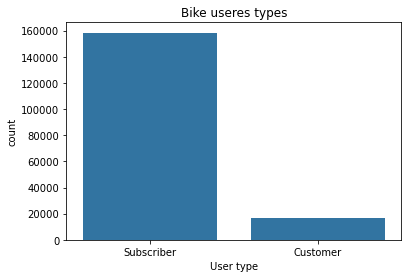

In [14]:
order = bikes['user_type'].value_counts().index
sb.countplot(data= bikes, x= 'user_type', color=base_color, order=order);
plt.title('Bike useres types');
plt.xlabel('User type');

In [15]:
# concatinating the start and end station to get the trip route
bikes['trip_route'] = bikes['start_station_name'] + " ---to--> "+bikes['end_station_name'] 

In [16]:
bikes['trip_route'].value_counts().head(2)

Berry St at 4th St ---to--> San Francisco Ferry Building (Harry Bridges Plaza)    327
Grand Ave at Perkins St ---to--> 19th Street BART Station                         308
Name: trip_route, dtype: int64

the msot common trip is  'Berry St at 4th St ---to--> San Francisco Ferry Building (Harry Bridges Plaza)'

extracting the trip start time 

In [17]:
bikes['start_hour'] = bikes['start_time'].apply(lambda x: x.hour)

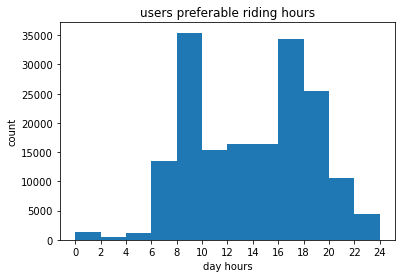

In [18]:
# the histograme shows the preferable times for riding bikes
bins= np.arange(0,26,2)
plt.hist(data= bikes, x='start_hour', bins = bins);
plt.xticks(bins);
plt.xlabel('day hours');
plt.ylabel('count')
plt.title('users preferable riding hours');

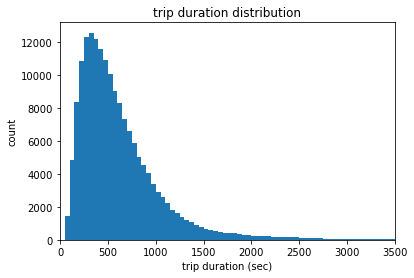

In [19]:
# histograme shows the distribution of trip duration
bins = np.arange(0,bikes['duration_sec'].max()+50,50)
plt.hist(data= bikes, x='duration_sec',bins=bins);
plt.xlim((0,3500));
plt.title('trip duration distribution');
plt.xlabel('trip duration (sec)');
plt.ylabel('count');

this histo shows that the majority of the trip durations between 450 and 650 sexonds

In [20]:
bikes['duration_sec'].describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> investigating the members ages we got some outliers so i used the axis limts to make the core data 
be more clear. I made the time and date string into time stmp format to extract the specific time and date

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I made concatination between start and end station to get the most common trip (start ---to--> end)

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [21]:
bikes['duration_minutes']= bikes['duration_sec'] /60

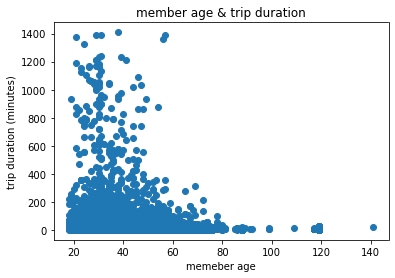

In [22]:
plt.scatter(data= bikes, x= 'customer_age', y = 'duration_minutes');
plt.title('member age & trip duration');
plt.xlabel('memeber age');
plt.ylabel('trip duration (minutes)');

In [23]:
bikes['duration_minutes'].describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_minutes, dtype: float64

In [24]:
bikes[bikes['duration_minutes'] == bikes['duration_minutes'].max()].count()

duration_sec          1
start_time            1
end_time              1
start_station_id      1
start_station_name    1
end_station_id        1
end_station_name      1
user_type             1
member_birth_year     1
member_gender         1
day_time              1
customer_age          1
trip_route            1
start_hour            1
duration_minutes      1
dtype: int64

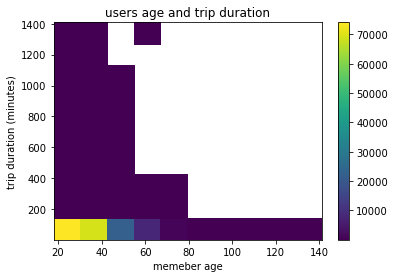

In [25]:
plt.hist2d(data= bikes, x= 'customer_age', y= 'duration_minutes', cmin=1);
plt.colorbar();
plt.title('users age and trip duration');
plt.xlabel('memeber age');
plt.ylabel('trip duration (minutes)');

this heat map to show the distribution between trip duration and users year of birth

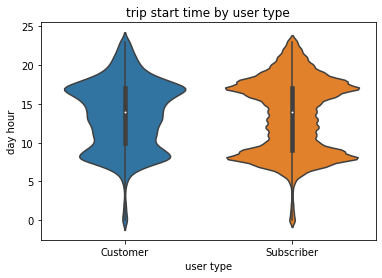

In [26]:
# violin plot for user type and day period
sb.violinplot(data= bikes, x= 'user_type', y = 'start_hour');
plt.title('trip start time by user type');
plt.xlabel('user type');
plt.ylabel('day hour');

according to this plot subscribers tedn to ride at the morning more than customers while the rest of the day the customers have the majority

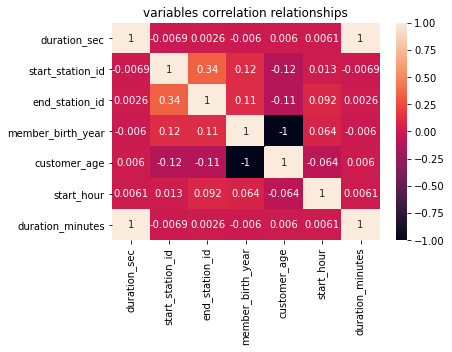

In [27]:
#heat map to show the correlation between the variables
sb.heatmap(bikes.corr(), annot = True);
plt.title('variables correlation relationships');

this heat map shows no correlation between variables

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I found that trip duration varies with customer age we had the majority of the customers use bikes for their 
short trips which has average 11 minutes duration. 
according to this correlation this dataset variabels have weak to no correlation at all. so it is hard to find a relationship between variables.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> the relation between type of customers and the time they start their trips there are two busy periods between 8:10 am and 
16:18 pm subscribers are more aviable at these times while customers more avilable between these periods more than sucribers

## Multivariate Exploration


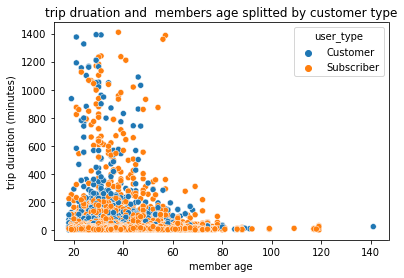

In [28]:
sb.scatterplot(data= bikes, x= 'customer_age', y = 'duration_minutes', hue='user_type' );
plt.xlabel('member age');
plt.ylabel('trip duration (minutes)');
plt.title('trip druation and  members age splitted by customer type');

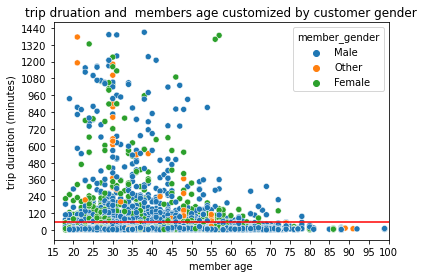

In [29]:
sb.scatterplot(data= bikes, x= 'customer_age', y = 'duration_minutes', hue='member_gender' );
plt.xlabel('member age');
plt.ylabel('trip duration (minutes)');
plt.title('trip druation and  members age customized by customer gender');
plt.xticks(np.arange(0,105,5));
plt.yticks(np.arange(0,1520,120));
plt.xlim((15,100));
plt.axhline(y=60, color = 'red');


from this plot we can see that men uses bikes more for shorter trips 60 minute or less while for longer trips women appear to use bikes more.

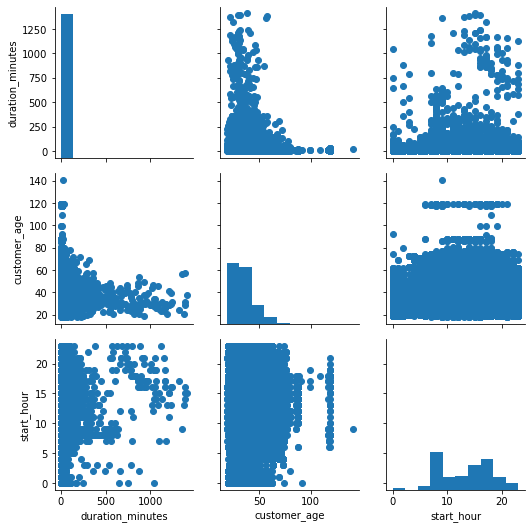

In [30]:
# Grid plot to see the realtionship between multi numeric variables
g = sb.PairGrid(data= bikes, vars= ['duration_minutes','customer_age','start_hour']);
g.map_diag(plt.hist);
g.map_offdiag(plt.scatter);

from this grid we can see there is poor relationship between variables which makes it diffcult to extract good insights

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> the subscribers tend to have the short trips while longer trips are done by customers

### Were there any interesting or surprising interactions between features?

> the relationship between varilables is weak so it is hard to find good relationships between variabales.